# Cissa gap filling example - Monte-Carlo component method
We can use CiSSA to fill in gaps of a time-series by making an initial guess for missing values, then iterating through CiSSA fitting until we reach a convergence.

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import copy
import os
import warnings
warnings.filterwarnings('ignore')
dir_path = os.path.abspath('')
os.chdir('../../..')
home_path = os.path.abspath('')
os.chdir('./pycissa/processing/cissa')
from cissa import Cissa
os.chdir(home_path)

In [2]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')

Here we will replace some data with NaN values to simulate missing values.

In [3]:
data_with_gaps = copy.deepcopy(data)
data_with_gaps['Electric power consumption in Spain'][100] = np.nan
data_with_gaps['Electric power consumption in Spain'][200] = np.nan
data_with_gaps['Electric power consumption in Spain'][300] = np.nan
data_with_gaps['Electric power consumption in Spain'][400] = np.nan
data_with_gaps['Electric power consumption in Spain'][500] = np.nan
print(data_with_gaps['Electric power consumption in Spain'][499:502])

499    21425.56417
500            NaN
501    19817.63946
Name: Electric power consumption in Spain, dtype: float64


In [4]:
#create the cissa object
cissa_object = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

### We can either fix the values before running CiSSA using the pre_fill_gaps function, or use auto_cissa which will do the job as part of the automated process.

We will use monte-carlo method to find significant components. All other components will be thrown away during the gap filling process.  

In [5]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 10, test_repeats=10, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True #just so we can see what is going on...
                       )

Checking for censored or nan data...
Step 0 of 5
iteration 0.  6291.540939061433  vs target error:  50
iteration 1.  734.0131095571596  vs target error:  50
iteration 2.  85.63486278166602  vs target error:  50
iteration 3.  16.386529589453858  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 1 of 5
iteration 0.  6301.617990331815  vs target error:  50
iteration 1.  875.9800210911744  vs target error:  50
iteration 2.  144.25703245387922  vs target error:  50
iteration 3.  23.742424678785028  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 2 of 5
iteration 0.  6291.540939061433  vs target error:  50
iteration 1.  798.4526155811509  vs target error:  50
iteration 2.  116.91556345670324  vs target error:  50
iteration 3.  17.232756498717208  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 3 of 5
iteration 0.  7060.396442775105  vs target error:  50
iteration 1.  1202.63150359684  vs target error:  50
iteration 2.  282.35

## Cool, let's look at the imputed points...

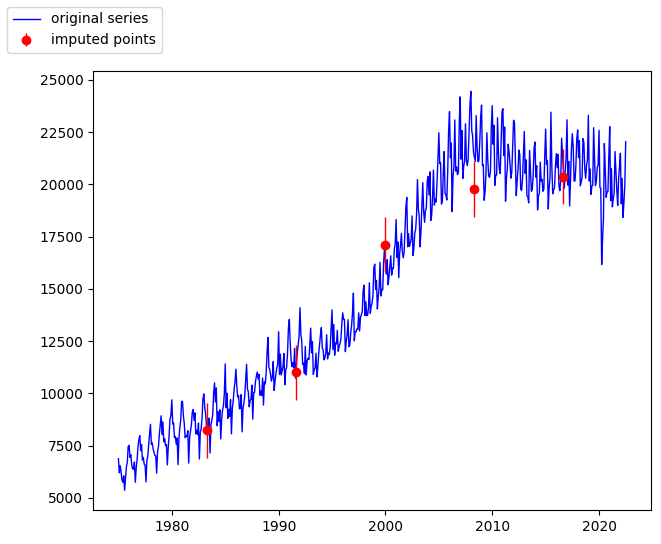

In [6]:
cissa_object.figures.get('cissa').get('figure_gap_fill')

## Let's see the error...

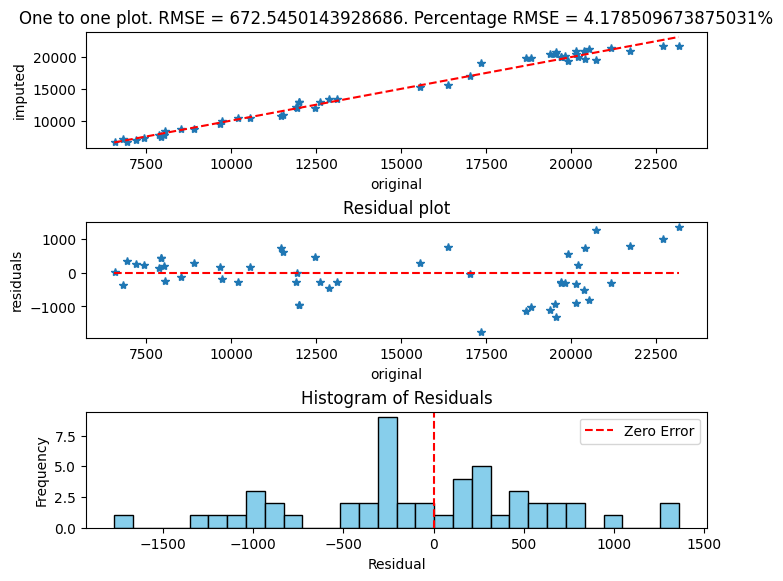

In [7]:
cissa_object.figures.get('cissa').get('figure_gap_fill_error')

## Lets try a smaller value of L, but we will use the pre_fill_gaps function so that we can run CiSSA after with a larger window size.

In [8]:
#create the cissa object
cissa_object_small_L = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

In [9]:
#here we choose a window length of 2 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_small_L.pre_fill_gaps(L = 12*2,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 10, test_repeats=10, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True #just so we can see what is going on...
                       )

Step 0 of 5
iteration 0.  5618.761109569379  vs target error:  50
iteration 1.  1637.942803867696  vs target error:  50
iteration 2.  495.6892328405229  vs target error:  50
iteration 3.  152.08633063611342  vs target error:  50
iteration 4.  46.890890253514954  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 1 of 5
iteration 0.  5014.330204717753  vs target error:  50
iteration 1.  1044.6521259828733  vs target error:  50
iteration 2.  217.63585957974647  vs target error:  50
iteration 3.  67.43892704284372  vs target error:  50
iteration 4.  24.091895120636764  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 2 of 5
iteration 0.  6723.796722268682  vs target error:  50
iteration 1.  1432.4190064227405  vs target error:  50
iteration 2.  305.29206770362725  vs target error:  50
iteration 3.  102.20570636896446  vs target error:  50
iteration 4.  38.96008182222249  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 3 of 5

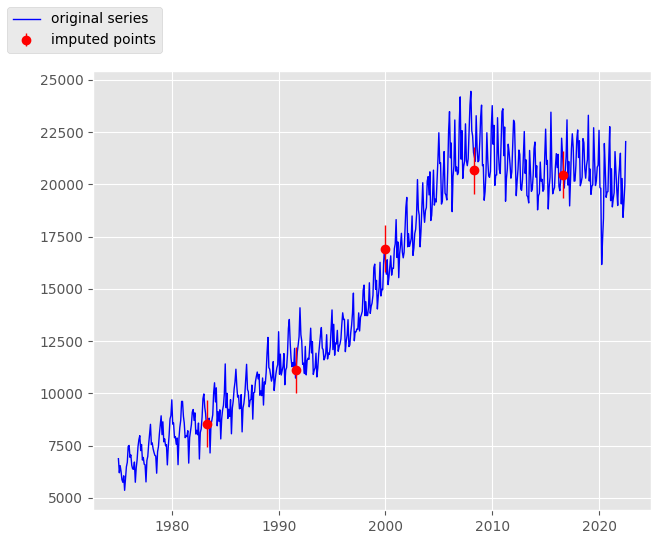

In [10]:
cissa_object_small_L.figures.get('cissa').get('figure_gap_fill')

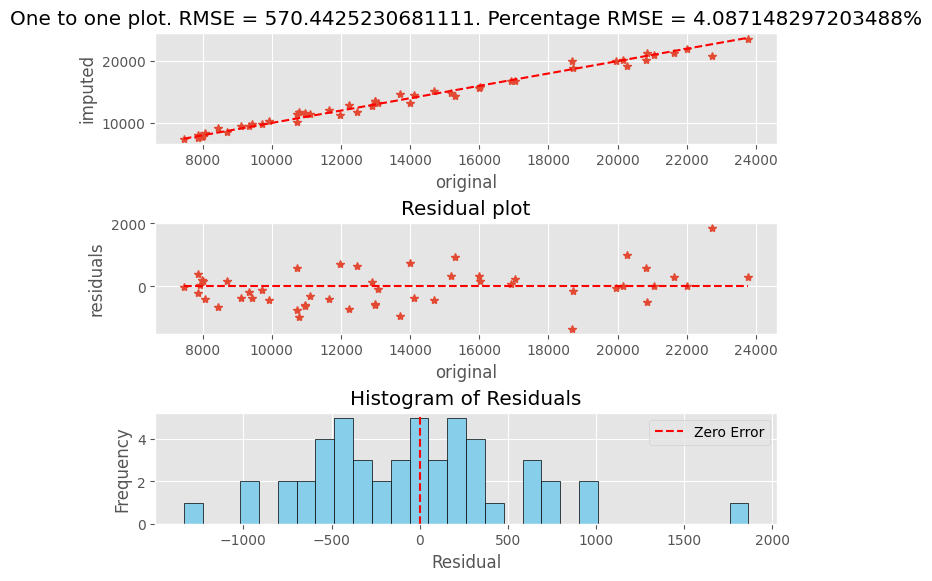

In [11]:
cissa_object_small_L.figures.get('cissa').get('figure_gap_fill_error')

In [15]:
print('''COMPONENT VARIANCE''')
print(f'''TREND   : {cissa_object.results.get('cissa').get('noise component tests').get('trend_share')}%''')
print(f'''PERIODIC: {cissa_object.results.get('cissa').get('noise component tests').get('periodic_share')}%''')
print(f'''NOISE   : {cissa_object.results.get('cissa').get('noise component tests').get('noise_share')}%''')

COMPONENT VARIANCE
TREND   : 93.01825187283362%
PERIODIC: 2.196928249375097%
NOISE   : 4.534419047667284%


### we could then rerun auto cissa with a larger window

In [13]:
cissa_object_gap_fixed = cissa_object_small_L = Cissa(t=data_with_gaps['Date'],x=cissa_object_small_L.x)
cissa_object_gap_fixed.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       )

Checking for censored or nan data...
RUNNING CISSA!
Performing monte-carlo significance analysis...
Grouping components...
Running frequency time analysis...
Analysing trend...
Calculating time-series autocorrelation...
Auto Cissa Complete!


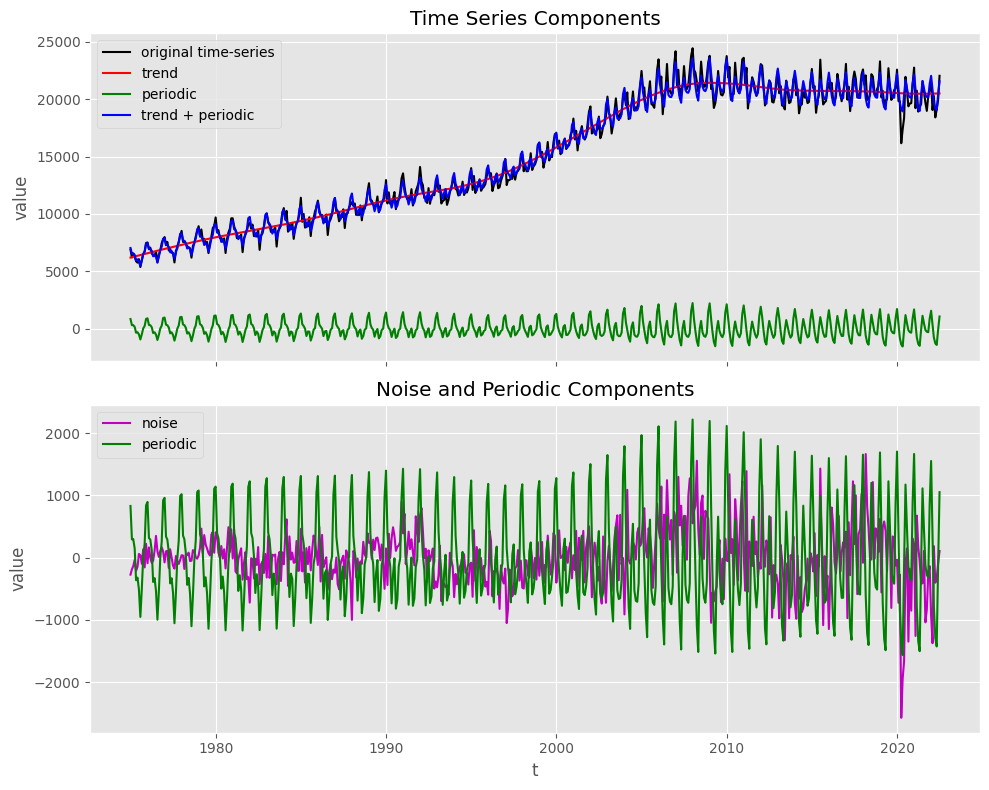

In [14]:
cissa_object_gap_fixed.figures.get('cissa').get('figure_split_components')

# Now let's try approximating then removing trend and refitting the gaps...

In [ ]:
cissa_object_no_trend = Cissa(t=data_with_gaps['Date'],
                              x=data_with_gaps['Electric power consumption in Spain'] - cissa_object.x_trend)

In [ ]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_no_trend.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 10, test_repeats=10, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50
                        verbose = True #just so we can see what is going on...
                       )

In [ ]:
cissa_object_no_trend.figures.get('cissa').get('figure_gap_fill')

In [ ]:
cissa_object_no_trend.figures.get('cissa').get('figure_gap_fill_error')